In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
df=pd.read_csv("./RSCCASN.csv",index_col="DATE",parse_dates=True)
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


<AxesSubplot:xlabel='DATE'>

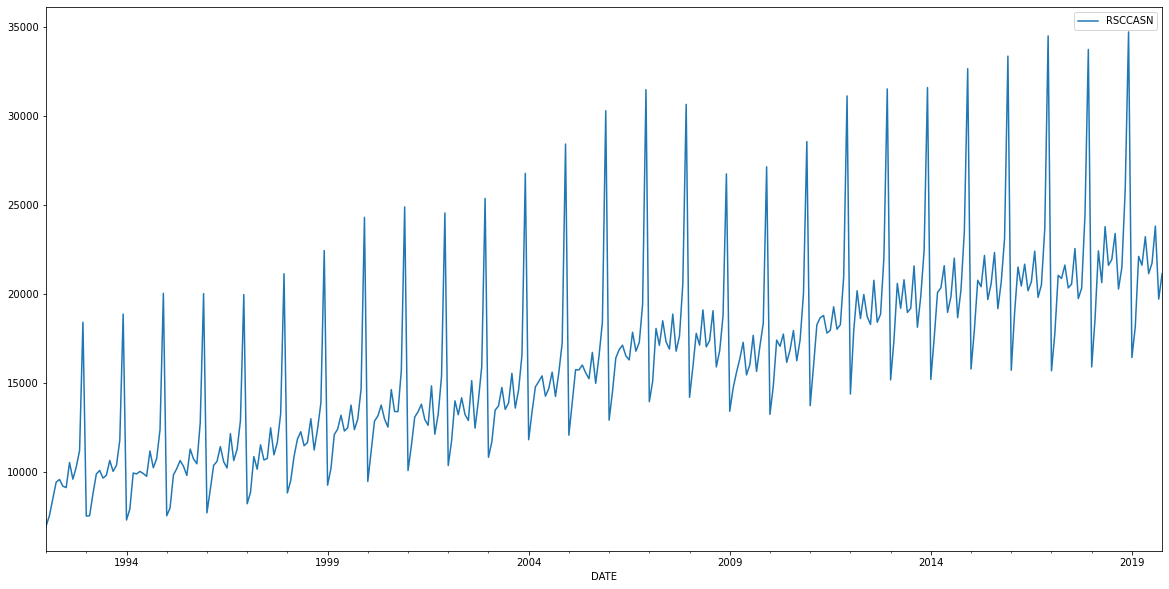

In [10]:
df.plot(figsize=(20,10))

In [15]:
#lets take 1.5 years as test data
train_data=df.iloc[:len(df)-18]
len(train_date)

316

In [17]:
testData=df.iloc[len(train_data):]
len(testData)

18

In [18]:
scaler=MinMaxScaler()
scaler.fit(train_data)
scaler_train=scaler.transform(train_data)
scaler_test=scaler.transform(testData)

In [62]:
length=12
nfeatures=1
generator=TimeseriesGenerator(scaler_train,scaler_train,length=length,batch_size=1)
test_generator=TimeseriesGenerator(scaler_test,scaler_test,length=length,batch_size=1)
early=EarlyStopping(monitor="val_loss",patience=4)


In [63]:
model=Sequential()
model.add(LSTM(100,activation="relu",input_shape=(length,nfeatures)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [64]:
model.fit(generator,validation_data=test_generator,callbacks=[early],epochs=20)

Epoch 1/20
304/304 [==============================] - 4s 8ms/step - loss: 0.0284 - val_loss: 0.0038
Epoch 2/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0185 - val_loss: 0.0140
Epoch 3/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0101 - val_loss: 0.0048
Epoch 4/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0054 - val_loss: 6.8902e-04
Epoch 5/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0039 - val_loss: 5.4145e-04
Epoch 6/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0032 - val_loss: 4.6763e-04
Epoch 7/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0020 - val_loss: 6.6175e-04
Epoch 8/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0015 - val_loss: 3.2833e-04
Epoch 9/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0015 - val_loss: 3.5499e-04
Epoch 10/20
304/304 [==============================] - 2s 6ms/step - loss: 0

<AxesSubplot:>

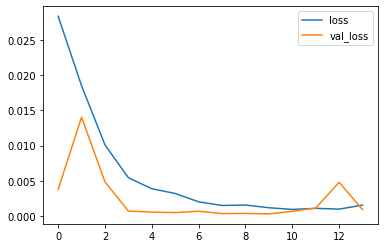

In [65]:
pd.DataFrame(model.history.history).plot()

In [87]:
predictions=[]
current_eval_batch=scaler_train[-length:]
current_eval_batch=current_eval_batch.reshape(1,length,nfeatures)
for i in range(len(scaler_test)):
    predict=model.predict(current_eval_batch)
    predictions.append(predict[0])
    current_eval_batch=np.append(current_eval_batch[:,1:,:],[predict],axis=1)
    

In [83]:
predictions=scaler.inverse_transform(predictions)

In [84]:
testData["predictions"]=predictions

<ipython-input-84-a53347f7640b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData["predictions"]=predictions


<AxesSubplot:xlabel='DATE'>

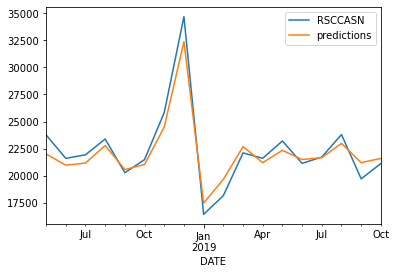

In [85]:
testData.plot()

In [93]:
#lets forecast now, so for that lets train the model with all data
fullScaler=MinMaxScaler()
full_df_scaller=fullScaler.fit_transform(df)
full_df_scaller

array([[0.        ],
       [0.02110343],
       [0.05535148],
       [0.08869922],
       [0.09435321],
       [0.08081245],
       [0.07796744],
       [0.12874532],
       [0.0948934 ],
       [0.11941804],
       [0.15301786],
       [0.41259723],
       [0.02031115],
       [0.02110343],
       [0.06583117],
       [0.10548113],
       [0.11253961],
       [0.09712619],
       [0.1028522 ],
       [0.13288678],
       [0.11073898],
       [0.1227312 ],
       [0.17365313],
       [0.42901901],
       [0.01231634],
       [0.03471622],
       [0.10742581],
       [0.10555315],
       [0.11059493],
       [0.10641746],
       [0.10072746],
       [0.15193748],
       [0.11808557],
       [0.13656007],
       [0.19504466],
       [0.47097378],
       [0.02088735],
       [0.03684097],
       [0.10360847],
       [0.11632094],
       [0.13259867],
       [0.12111063],
       [0.10249208],
       [0.15579084],
       [0.13583982],
       [0.12608038],
       [0.20934169],
       [0.470

In [95]:
length=12
nfeatures=1
generator=TimeseriesGenerator(full_df_scaller,full_df_scaller,length=length,batch_size=1)
#cant perform EarlyStoppeing because we dont have test data here, we are forecasing future

In [96]:
model=Sequential()
model.add(LSTM(100,activation="relu",input_shape=(length,nfeatures)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [97]:
model.fit(generator,validation_data=test_generator,epochs=8)

Epoch 1/8
322/322 [==============================] - 4s 9ms/step - loss: 0.0225 - val_loss: 0.0030
Epoch 2/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0164 - val_loss: 0.0044
Epoch 3/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0082 - val_loss: 0.0050
Epoch 4/8
322/322 [==============================] - 2s 8ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 5/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0031 - val_loss: 9.5794e-04
Epoch 6/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0015 - val_loss: 4.1237e-04
Epoch 7/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0014 - val_loss: 9.9825e-04
Epoch 8/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0012 - val_loss: 5.0378e-04


In [106]:
forcasting=[]
periods=12
current_eval_batch=scaler_train[-length:]
current_eval_batch=current_eval_batch.reshape(1,length,nfeatures)
for i in range(12):
    predict=model.predict(current_eval_batch)
    forcasting.append(predict[0])
    current_eval_batch=np.append(current_eval_batch[:,1:,:],[predict],axis=1)
    

In [108]:
forcasting=fullScaler.inverse_transform(forcasting)

In [109]:
forcasting

array([[21609.84499645],
       [20751.82533979],
       [20922.03269625],
       [22336.1781354 ],
       [20385.72179222],
       [20888.06173229],
       [24053.01355267],
       [32136.26912117],
       [16980.2158246 ],
       [19260.81862926],
       [22130.37284994],
       [20869.16543531]])

In [111]:
forecasting_index=pd.date_range("2019-10-01",periods=12,freq='MS') #MS=>Monthly start
forecasting_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [112]:
foreCastingDf=pd.DataFrame(data=forcasting,index=forecasting_index)

<AxesSubplot:>

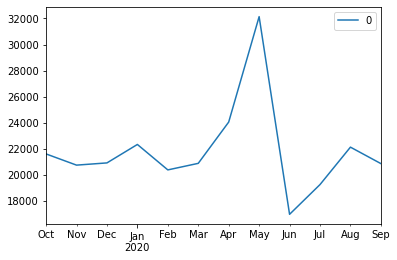

In [113]:
foreCastingDf.plot()

<AxesSubplot:xlabel='DATE'>

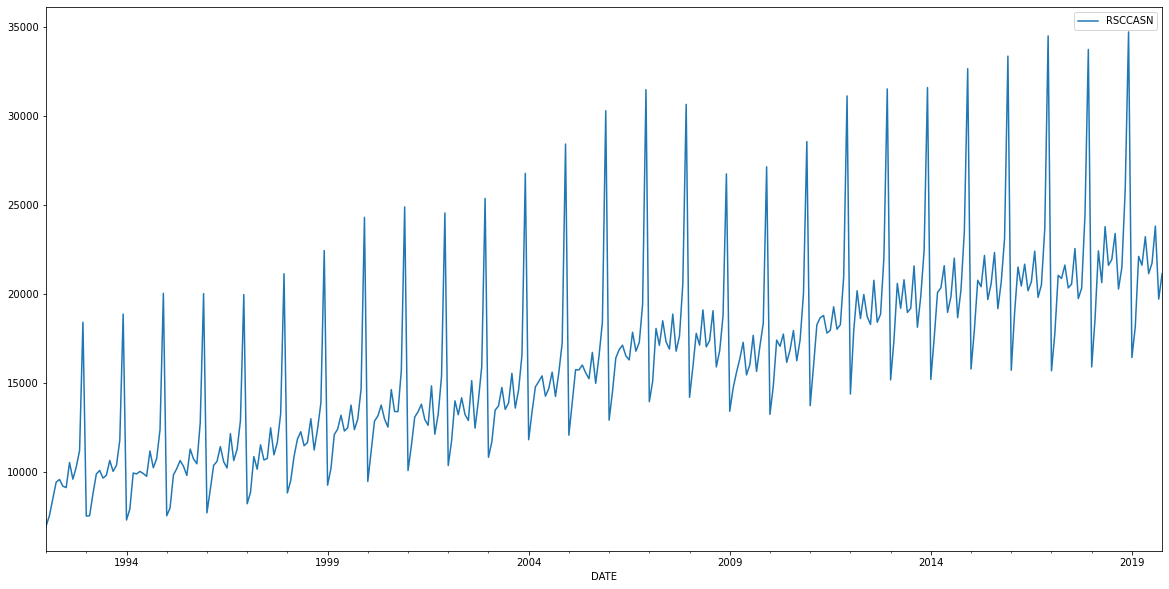

In [115]:
df.plot(figsize=(20,10))

<AxesSubplot:xlabel='DATE'>

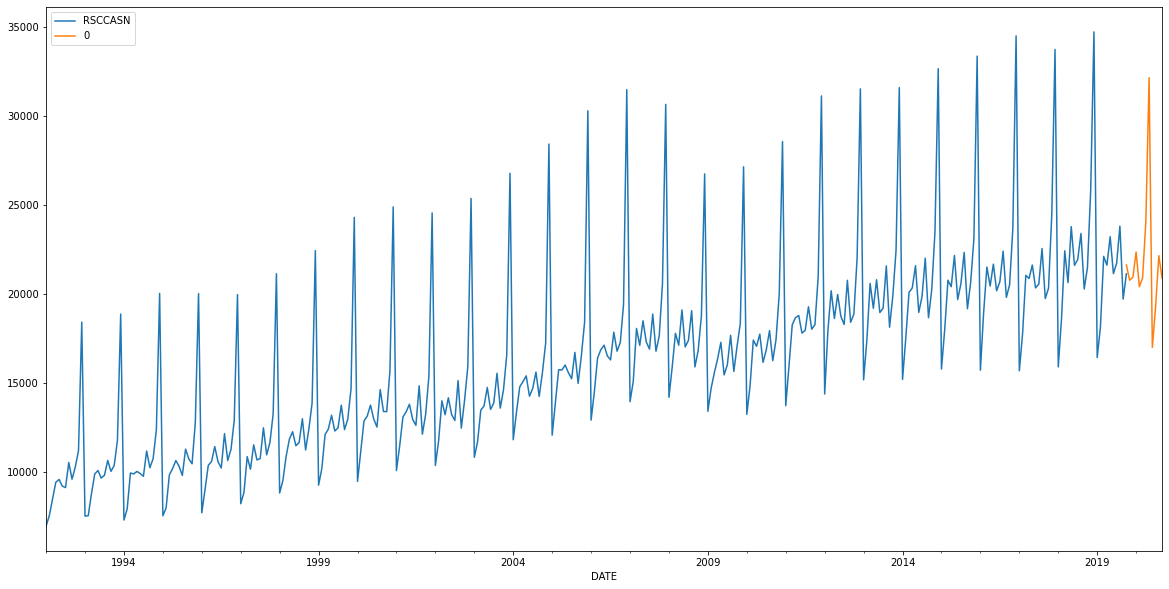

In [117]:
ax=df.plot()
foreCastingDf.plot(ax=ax,figsize=(20,10))